In [104]:
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

# <font color = 'blue'> Importação e Exportação na União Europeia </font>



**O que é a União Europeia (UE) e como ela afeta importação e exportação?**

   A União Europeia é uma união política e econômica que atualmente consiste de 28 países. Esta união teve seu início em 1951 com o tratado de Paris e consistia de somente 6 países. No decorrer do tempo, foi evoluindo e crescendo até que em 1992 foi assinado o Tratado de Maastricht e consequentemente em 1993 a atual União Europeia foi efetivamente formada. Neste meio tempo diversos países se juntaram para formar esta organização que tem como principais objetivos manter a paz, promover inclusão e proporcionar o desenvolvimento tanto econômico quanto social. Um dos pilares de uma economia saudável é a importação e a exportação. Dentro da UE quando um país membro importa um produto de outro não são postas tarifas, impostos nem quotas. Isto, na teoria, leva todos os países membros a um crescimento econômico saudável. Por esta razão é interessante analisar os reais impactos que a UE tem na importação e exportação em países membros. 

   Contudo, para se fazer esta analise é importante considerar os pactos econômicos existentes entre a UE e países da Europa que não fazem parte da UE que impactam significativamente a importação e exportação. Um deles é a área de livre comercio europeia. Neste pacto estão incluídos Noruega, Suíça, Liechtenstein e Islândia. Estes países podem comprar e vender produtos com membros da UE sem tarifas, impostos nem quotas. Além disso este acordo prevê que estes países possam moldar seus próprios acordos com países que não fazem parte da UE. Outro exemplo é a união aduaneira. Os países que fazem parte deste acordo são Turquia, San Marino, Mônaco e Andorra. A união aduaneira é extremamente semelhante a área livre de comercio, no entanto estes 4 países não estão livres para negociar pactos com países não membros. A própria UE determina as tarifas, impostos e quotas que vão ser cobradas. Existem alguns outros exemplos, mas estes vão ser os principais que vão ser usados para fazer a análise.
   
   Os países atualmente membros da UE são Alemanha, Áustria, Bélgica, Bulgária, Chipre, Croácia, Dinamarca, Eslováquia, Eslovênia, Espanha, Estônia, Finlândia, França, Grécia, Holanda, Hungria, Irlanda, Itália, Letônia, Lituânia, Luxemburgo, Malta, Polônia, Portugal, Reino Unido, República Tcheca, Romênia e Suécia.

**Pergunta:** Que impacto que membros da União Europeia e países europeus com acordos com a UE sentem nas suas importações e exportações devido aos acordos formados e como que o PIB per capita de um país influencia nisto?

**Hipótese:** Países com acordos de importação e exportação com a UE e os países membros da UE ambos sentirão um impacto significativo na quantidade de importação e exportação devido ao beneficio econômico, expostos na introdução, que este propicia. Adicionalmente, existem diversos estudos como o de Muhammad S. Anwer e R.K. Sampath de 1997 que determinam que somente para alguns países há uma relação entre exportação e PIB. Isto é sustentado por Mücahit Aydin e Murat Sari na pesquisa publicada em 2017 onde eles encontram uma relação direta entre PIB e exportação na Turquia. Outra pesquisa conduzida por S. Bakari em 2016 conclui que há relação entre exportação e PIB mas nenhuma relação estatística entre importação e PIB. Apesar disso, a potêncial relação que se busca descobrir é a de PIB per capita com importação e exportação. Porém é possivel que a relação seja semelhante e então se pode supor que para os países de dentro da UE quanto maior o PIB per capita mais exportação relativa haverá. Além disso não haverá relação entre PIB per capita e importação em caso algum.

Para responder esta pergunta definitivamente, serão utilizados os dados a seguir:

# Dados

* Para esta análise foram coletados 3 diferentes tipos de dados do site https://www.gapminder.org/:

    1. Exportação por porcentagem de PIB
    2. Importação por porcentagem de PIB
    3. PIB per capita

Com isto é possivel montar um data frame destes dados. É iportante apontar que usaremos o ano de 2004 como referência e ponto de comparação pois neste ano 10 países novos entraram na UE.

Estes dados serão utilizados para criar gráficos que comparam o crescimento tanto da importação quanto da exportação ambos de países da UE e de países que não tem pactos com esta. Além disso, tabelas poderão ser montadas para comparar o PIB com a importação e exportação.

Inicia-se lendo os arquivos de excel e salvando-os em uma variavel.

In [105]:
Expo = pd.read_excel('exports_percent_of_gdp.xlsx')
Impo = pd.read_excel('imports_percent_of_gdp.xlsx')
PIB = pd.read_excel('income_per_person_gdppercapita_ppp_inflation_adjusted.xlsx')

Agora são escolhidos os anos que serão analisados. Já que 10 paises novos entraram na UE em 2004 é interessante analisar o impacto que estes tiveram nos outros paises da UE e neles mesmos quando comparados a paises que nao fazem parte dos pactos econômicos. Por esta razão os dados são pegos desde 2000 até 2008.

In [106]:
i=0
tempo = ['country']
ano_inicial = 2000

while i < 9:
    tempo.append(ano_inicial)
    ano_inicial += 1
    i+=1

Expo = Expo[tempo]
Impo = Impo[tempo]
PIB = PIB[tempo]

## Selecionando os Dados

Para separar somente paises da Europa foi pego uma lista na internet com todos os países da Europa e com isto foi criada uma lista para os dados então poderem ser selecionados de forma rápida e facil. Nota-se também que para isto poder dar certo o nome de alguns países foram alterados para não conter espaços. Adicionalmente, os países da Andorra, San Marino e Mónaco não se encontram em todos os documentos de Excel. Portanto, elas ficarão fora da lista.

In [107]:
Europe = 'Albania, Armenia, Austria, Azerbajan, Belarus, Belgium, Bosnia, Bulgaria, Croatia, Cyprus, Czech, Denmark, Estonia, Finland, France, Georgia, Germany, Gibraltar, Greece, Hungary, Iceland, Ireland, Italy, Kazakhstan, Kosovo, Latvia, Lichenstein, Lithua, Luxembourg, Macedonia, Malta, Moldova, Netherlands, Norway, Poland, Portugal, Romania, Russia, Serbia, Slovakia, Slovenia, Spain, Sweden, Switzerland, Turkey, Ukraine, UnitedKingdom'
Europe = Europe.replace(' ', '')
EuropeList = Europe.split(',')

ExpoEurope = Expo[Expo.country.isin(EuropeList)]
ImpoEurope = Impo[Impo.country.isin(EuropeList)]
PIBEurope = PIB[PIB.country.isin(EuropeList)]


Agora é adicionado uma variavel qualitativa para separar países da União Europeia e os fora dela. A lista dos países da União Europeia foi pego da mesma forma da lista dos países europeus e então foi utilizado o 'for' para poder pegar a frase necessaria para effetivamente adicionar uma nova coluna com a distinção de UE ou não. Contudo é crucial ressaltar que os seguintes países foram adicionados no grupo da UE mesmo não fazendo parte dela devido aos pactos citados na introdução: Islândia, Liechtenstein, Noruega, Suiça e Turquia. Todos os pactos entre estes países e a UE foram feitos antes do ano 2000, portanto sendo importante analisá-los também. Adicionalmente, três países que atualmente fazem parte da UE foram retirados da lista pois estes ingressaram ou no ano de 2007 como é o caso da Bulgaria e Romênia ou em 2013, caso da Croácia.

In [108]:
EUCountries = ['Austria', 'Belgium', 'Cyprus', 'Czech', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'UnitedKingdom']
Statement = ''
for i in EUCountries:
    Statement += '(ExpoEurope.country == ' "'" + i + "'"')|'
Statement = ''
for i in EUCountries:
    Statement += '(ImpoEurope.country == ' "'" + i + "'"')|'
Statement = ''
for i in EUCountries:
    Statement += '(PIBEurope.country == ' "'" + i + "'"')|'
    

Statement = Statement.strip(Statement[len(Statement)-1])

#print(Statement)



StatementExpo = (ExpoEurope.country == 'Austria')|(ExpoEurope.country == 'Belgium')|(ExpoEurope.country == 'Cyprus')|(ExpoEurope.country == 'Czech')|(ExpoEurope.country == 'Denmark')|(ExpoEurope.country == 'Estonia')|(ExpoEurope.country == 'Finland')|(ExpoEurope.country == 'France')|(ExpoEurope.country == 'Germany')|(ExpoEurope.country == 'Greece')|(ExpoEurope.country == 'Hungary')|(ExpoEurope.country == 'Iceland')|(ExpoEurope.country == 'Ireland')|(ExpoEurope.country == 'Italy')|(ExpoEurope.country == 'Latvia')|(ExpoEurope.country == 'Liechtenstein')|(ExpoEurope.country == 'Lithuania')|(ExpoEurope.country == 'Luxembourg')|(ExpoEurope.country == 'Malta')|(ExpoEurope.country == 'Netherlands')|(ExpoEurope.country == 'Norway')|(ExpoEurope.country == 'Poland')|(ExpoEurope.country == 'Portugal')|(ExpoEurope.country == 'Slovakia')|(ExpoEurope.country == 'Slovenia')|(ExpoEurope.country == 'Spain')|(ExpoEurope.country == 'Sweden')|(ExpoEurope.country == 'Switzerland')|(ExpoEurope.country == 'Turkey')|(ExpoEurope.country == 'UnitedKingdom')
StatementImpo = (ImpoEurope.country == 'Austria')|(ImpoEurope.country == 'Belgium')|(ImpoEurope.country == 'Cyprus')|(ImpoEurope.country == 'Czech')|(ImpoEurope.country == 'Denmark')|(ImpoEurope.country == 'Estonia')|(ImpoEurope.country == 'Finland')|(ImpoEurope.country == 'France')|(ImpoEurope.country == 'Germany')|(ImpoEurope.country == 'Greece')|(ImpoEurope.country == 'Hungary')|(ImpoEurope.country == 'Iceland')|(ImpoEurope.country == 'Ireland')|(ImpoEurope.country == 'Italy')|(ImpoEurope.country == 'Latvia')|(ImpoEurope.country == 'Liechtenstein')|(ImpoEurope.country == 'Lithuania')|(ImpoEurope.country == 'Luxembourg')|(ImpoEurope.country == 'Malta')|(ImpoEurope.country == 'Netherlands')|(ImpoEurope.country == 'Norway')|(ImpoEurope.country == 'Poland')|(ImpoEurope.country == 'Portugal')|(ImpoEurope.country == 'Slovakia')|(ImpoEurope.country == 'Slovenia')|(ImpoEurope.country == 'Spain')|(ImpoEurope.country == 'Sweden')|(ImpoEurope.country == 'Switzerland')|(ImpoEurope.country == 'Turkey')|(ImpoEurope.country == 'UnitedKingdom')
StatementPIB = (PIBEurope.country == 'Austria')|(PIBEurope.country == 'Belgium')|(PIBEurope.country == 'Cyprus')|(PIBEurope.country == 'Czech')|(PIBEurope.country == 'Denmark')|(PIBEurope.country == 'Estonia')|(PIBEurope.country == 'Finland')|(PIBEurope.country == 'France')|(PIBEurope.country == 'Germany')|(PIBEurope.country == 'Greece')|(PIBEurope.country == 'Hungary')|(PIBEurope.country == 'Iceland')|(PIBEurope.country == 'Ireland')|(PIBEurope.country == 'Italy')|(PIBEurope.country == 'Latvia')|(PIBEurope.country == 'Liechtenstein')|(PIBEurope.country == 'Lithuania')|(PIBEurope.country == 'Luxembourg')|(PIBEurope.country == 'Malta')|(PIBEurope.country == 'Netherlands')|(PIBEurope.country == 'Norway')|(PIBEurope.country == 'Poland')|(PIBEurope.country == 'Portugal')|(PIBEurope.country == 'Slovakia')|(PIBEurope.country == 'Slovenia')|(PIBEurope.country == 'Spain')|(PIBEurope.country == 'Sweden')|(PIBEurope.country == 'Switzerland')|(PIBEurope.country == 'Turkey')|(PIBEurope.country == 'UnitedKingdom')
ExpoEurope['EU'] = np.select([StatementExpo], [1])
ImpoEurope['EU'] = np.select([StatementImpo], [1])
PIBEurope['EU'] = np.select([StatementPIB], [1])


/Users/EduardoGoncalves/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/EduardoGoncalves/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/EduardoGoncalves/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

A seguir, muda-se o índice do data frame para facilitar o processo.

In [109]:
ExpoEurope = ExpoEurope.set_index('country')
ImpoEurope = ImpoEurope.set_index('country')
PIBEurope = PIBEurope.set_index('country')

Em seguida o data frame é separado em 2, um somente com os países da UE e outro somente com os países que não fazem parte da UE.

In [110]:
ExpoEU = ExpoEurope[(ExpoEurope.EU == 1)]
ExpoRestEurope = ExpoEurope[(ExpoEurope.EU == 0)]

ImpoEU = ImpoEurope[(ImpoEurope.EU == 1)]
ImpoRestEurope = ImpoEurope[(ImpoEurope.EU == 0)]

PIBEU = PIBEurope[(PIBEurope.EU == 1)]
PIBRestEurope = PIBEurope[(PIBEurope.EU == 0)]

Agora, para podermos fazer uma melhor análise do impacto em importação e exportação que os países adicionados a UE em 2004 tiveram são criados os data frames dos países da UE sem estes dez países e um somente com estes dez países. Os países adicionados em 2004 são: Chipre, República Checa, Estonia, Hungria, Latvia, Lithuania, Malta, Polonia, Slovakia e Slovenia. Contudo a Lithuania não pode ser adicionada, portanto ficam nove países.

In [111]:
ten_countries_2004 = ['Cyprus', 'Czech', 'Estonia', 'Hungary', 'Latvia', 'Malta', 'Poland', 'Slovakia', 'Slovenia']
rest_countries = ['Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Norway', 'Portugal', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'UnitedKingdom']

ExpoEUminus10 = ExpoEU.drop(ten_countries_2004)
ImpoEUminus10 = ImpoEU.drop(ten_countries_2004)
PIBEUminus10 = PIBEU.drop(ten_countries_2004)

Expo10 = ExpoEU.drop(rest_countries)
Impo10 = ImpoEU.drop(rest_countries)
PIB10 = PIBEU.drop(rest_countries)

Tendo todos estes dados agora é crucial verificar se existem dados aberrantes que afetarão negativamente os resultados. Para se fazer isto é criado um boxplot de cada um destes dados.

Text(0, 0.5, 'PIB per Capita')

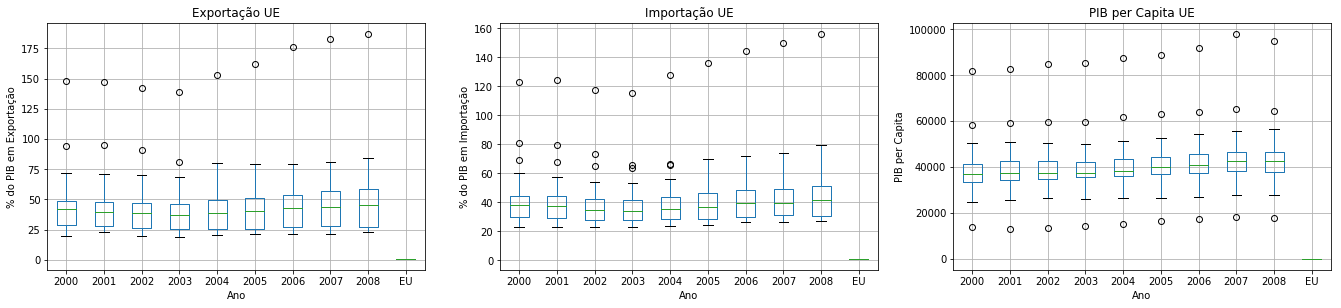

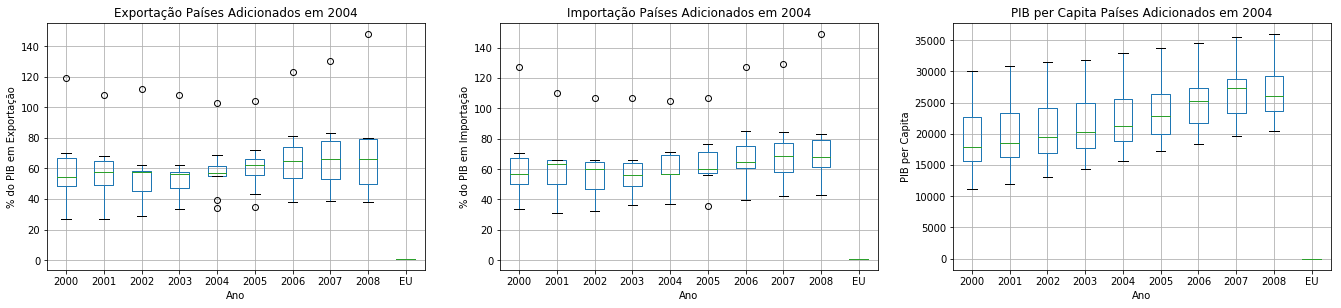

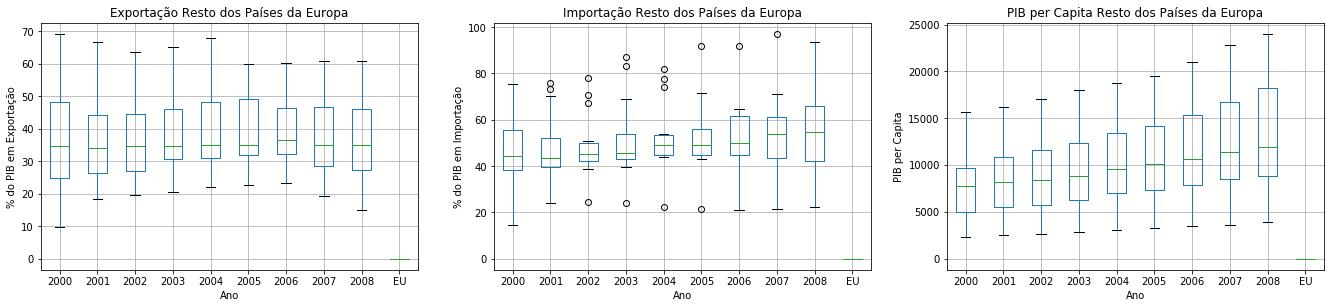

In [112]:
fig = plt.figure(figsize=(23, 10))
plt.subplot(231)    
ExpoEUminus10.boxplot()
plt.title('Exportação UE')
plt.xlabel('Ano')
plt.ylabel('% do PIB em Exportação')
plt.subplot(232) 
ImpoEUminus10.boxplot()
plt.title('Importação UE')
plt.xlabel('Ano')
plt.ylabel('% do PIB em Importação')
plt.subplot(233) 
PIBEUminus10.boxplot()
plt.title('PIB per Capita UE')
plt.xlabel('Ano')
plt.ylabel('PIB per Capita')

fig = plt.figure(figsize=(23, 10))
plt.subplot(231)    
Expo10.boxplot()
plt.title('Exportação Países Adicionados em 2004')
plt.xlabel('Ano')
plt.ylabel('% do PIB em Exportação')
plt.subplot(232) 
Impo10.boxplot()
plt.title('Importação Países Adicionados em 2004')
plt.xlabel('Ano')
plt.ylabel('% do PIB em Importação')
plt.subplot(233) 
PIB10.boxplot()
plt.title('PIB per Capita Países Adicionados em 2004')
plt.xlabel('Ano')
plt.ylabel('PIB per Capita')

fig = plt.figure(figsize=(23, 10))
plt.subplot(231)    
ExpoRestEurope.boxplot()
plt.title('Exportação Resto dos Países da Europa')
plt.xlabel('Ano')
plt.ylabel('% do PIB em Exportação')
plt.subplot(232) 
ImpoRestEurope.boxplot()
plt.title('Importação Resto dos Países da Europa')
plt.xlabel('Ano')
plt.ylabel('% do PIB em Importação')
plt.subplot(233) 
PIBRestEurope.boxplot()
plt.title('PIB per Capita Resto dos Países da Europa')
plt.xlabel('Ano')
plt.ylabel('PIB per Capita')

Nota-se com isto que existem diversos dados aberrantes que poderiam influenciar o resultado. Para identificar os países com valores muito acima ou abaixo foi, utilizando um outro documento, feita uma análise utilizando a função 'sort_values' do pandas. Com isso se identificaram como países com dados aberrantes e indesejados: Luxemburgo, Malta e Maldova. Portanto estes países serão removidos de suas respectivas bases de dados.

In [113]:
ExpoEUminus10n = ExpoEUminus10.drop(['Luxembourg'])
Expo10n = Expo10.drop(['Malta'])
ExpoRestEuropen = ExpoRestEurope.drop(['Moldova'])

ImpoEUminus10n = ImpoEUminus10.drop(['Luxembourg'])
Impo10n = Impo10.drop(['Malta'])
ImpoRestEuropen = ImpoRestEurope.drop(['Moldova'])

PIBEUminus10n = PIBEUminus10.drop(['Luxembourg'])
PIB10n = PIB10.drop(['Malta'])
PIBRestEuropen = PIBRestEurope.drop(['Moldova'])

Com isto, finalmente se criam os gráficos que podem responder a primeira parte da pergunta feita. Os gráficos são da média de importação com o tempo e o outro da média de exportação com o tempo. Estes gráficos simples dão uma idea do impacto do ingresso dos 10 países na importação e exportação na Europa. É importante ressaltar que a média foi utilizada pois com a retirada dos dados aberrantes, como mostram os boxplots, os dados no geral são relativamente simetricos. Portanto a média é uma boa medida de tendência central neste caso.

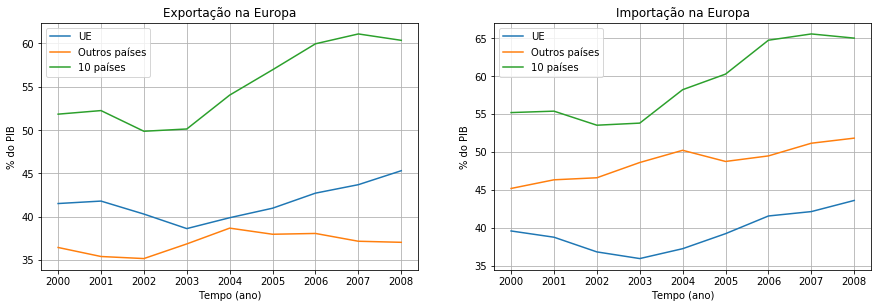

In [114]:
ExpoEUminus10_y = []
i=2000
while i<2009:
    ExpoEUminus10_y.append(ExpoEUminus10n[i].mean())
    i +=1
    
ExpoRestEurope_y = []
i= 2000
while i<2009:
    ExpoRestEurope_y.append(ExpoRestEuropen[i].mean())
    i +=1
    
Expo10_y = []
i= 2000
while i<2009:
    Expo10_y.append(Expo10n[i].mean())
    i +=1
    
    

ImpoEUminus10_y = []
i=2000
while i<2009:
    ImpoEUminus10_y.append(ImpoEUminus10n[i].mean())
    i +=1
    
ImpoRestEurope_y = []
i= 2000
while i<2009:
    ImpoRestEurope_y.append(ImpoRestEuropen[i].mean())
    i +=1

Impo10_y = []
i= 2000
while i<2009:
    Impo10_y.append(Impo10n[i].mean())
    i +=1
    
    
x = []
i = 2000
while i<2009:
    x.append(i)
    i += 1

fig = plt.figure(figsize=(23, 10))
plt.subplot(231)    
plt.plot(x, ExpoEUminus10_y, label = 'UE')
plt.plot(x, ExpoRestEurope_y, label = 'Outros países')
plt.plot(x, Expo10_y, label = '10 países')
plt.legend()
plt.title('Exportação na Europa')
plt.xlabel('Tempo (ano)')
plt.grid(True)
plt.ylabel('% do PIB')

plt.subplot(232) 
plt.plot(x, ImpoEUminus10_y, label = 'UE')
plt.plot(x, ImpoRestEurope_y, label = 'Outros países')
plt.plot(x, Impo10_y, label = '10 países')
plt.legend()
plt.title('Importação na Europa')
plt.xlabel('Tempo (ano)')
plt.grid(True)
plt.ylabel('% do PIB')
plt.show()

In [115]:
ExpoDif1 = round(Expo10n[2008].mean() - Expo10n[2004].mean(), 2)
ExpoDif2 = round(ExpoEUminus10n[2008].mean() - ExpoEUminus10n[2004].mean(), 2)
ExpoDif3 = round(ExpoRestEuropen[2004].mean() - ExpoRestEuropen[2008].mean(), 2)
ImpoDif1 = round(Impo10n[2008].mean() - Impo10n[2004].mean(), 2)
ImpoDif2 = round(ImpoEUminus10n[2008].mean() - ImpoEUminus10n[2004].mean(), 2)
ImpoDif3 = round(ImpoRestEuropen[2008].mean() - ImpoRestEuropen[2004].mean(), 2)
print('Olhando estes gráficos percebe-se que, em relação a exportação na Europa, a entrada dos 10 países afetou diretamente os 3 grupos analisados. Para os próprios 10 países que ingressaram a importação, em porcentagem de PIB, aumentou {}%. Para os outros países membros da UE também houve um aumento significativo, desta vez de {}%. Contudo para o resto dos países na Europa houve um declínio das exportações de {}%. Isto é especialmente significativo já que, de acordo com o site https://data.worldbank.org/indicator/NE.EXP.GNFS.ZS?name_desc=false houve um aumento mundial na taxa de exportação de 3,22% entre estes anos. Também, entre 2002 e 2004 o gráfico mostra uma crescente e posterior a este ano há uma decaída quase constante até pelo menos o ano de 2008. Além disso, analisando o gráfico de importação, também se nota um impacto maior na variação da porcentagem do PIB de importação entre os anos de 2004 e 2008 para os países que entraram na UE e aqueles que já faziam parte dela. Estes tiveram um aumento de {}% e {}% respectivamente. Já o resto dos países Europeus, que estavam em uma crescente desde pelo menos 2000, viram uma pequena queda no ano de 2005 e um aumento de somente {}% entre 2004 e 2008. Este número está abaixo da tendência mundial entre estes anos que foi um aumento de aproximadamente 3,5% de acordo com o site https://data.worldbank.org/indicator/NE.IMP.GNFS.ZS?name_desc=false. Percebe-se também que em ambos os casos os novos países da UE e os antigos mémbros dela estão acima da média de aumento mundial.'.format(ExpoDif1, ExpoDif2, ExpoDif3, ImpoDif1, ImpoDif2, ImpoDif3))


Olhando estes gráficos percebe-se que, em relação a exportação na Europa, a entrada dos 10 países afetou diretamente os 3 grupos analisados. Para os próprios 10 países que ingressaram a importação, em porcentagem de PIB, aumentou 6.32%. Para os outros países membros da UE também houve um aumento significativo, desta vez de 5.43%. Contudo para o resto dos países na Europa houve um declínio das exportações de 1.64%. Isto é especialmente significativo já que, de acordo com o site https://data.worldbank.org/indicator/NE.EXP.GNFS.ZS?name_desc=false houve um aumento mundial na taxa de exportação de 3,22% entre estes anos. Também, entre 2002 e 2004 o gráfico mostra uma crescente e posterior a este ano há uma decaída quase constante até pelo menos o ano de 2008. Além disso, analisando o gráfico de importação, também se nota um impacto maior na variação da porcentagem do PIB de importação entre os anos de 2004 e 2008 para os países que entraram na UE e aqueles que já faziam parte dela. Estes ti

## Análise

Observando os gráficos de importação e o de exportação com o tempo e analisando os dados percebe-se que a primeira parte da hipótese estava correta, contudo incompleta. A hipótese corretamente previu um impacto significativo na importação e na exportação dos países que ingressaram na União Europeia e dos países já membros dela. Contudo é importante afirmar que 'significativo' é relativo. Mas como a variação nos níveis de importação e exportação subiu aproximadamente entre 75% e 100% a mais do que a média mundial e vendo que entre os anos de 2000 e 2004 esta variação não era tão acentuada para os países da UE e os 10 países novos, a afirmação que o impacto foi significativo está sustentado. O que a primeira parte da hipótese não previu é o impacto negativo no resto dos países da Europa. Porem, este resultado faz sentido quando se considera que os países que entraram na UE em 2004 vão dar preferência a comprar produtos dos outros membros da UE devido aos fatores abordados na introdução. Esta pode ser uma razão para a queda de exportação do resto dos países Europeus entre 2004 e 2008. A importação estagnada destes países também pode ter sido fruto da inclusão dos 10 países na UE pois para a maioria dos acordos econômicos o país de fora da UE tem que negociar com a UE como um todo e não com países individuais. Portanto, é possível que o custo de importação dos produtos de um país recém ingressado na UE subiu para os países de fora, desta forma tornando mais difícil importar produtos de países que antes eram mais acessíveis.

## Relação entre PIB per capita, exportação e importação

Agora vão ser relacionados o PIB per capita com importação e depois com exportação. Utilizando gráficos de dispersão para cada um dos três grupos (países da UE, os 10 países que entraram na UE e o resto dos países da Europa) vai se poder notar a correlação ou não entre os fatores. Para chegar a um resultado conclusivo os dados analisados serão dos anos de 2000, 2004 e 2008 pois estes três pontos são tidos como importantes sendo 2000 o ano de base, 2004 o ano em que 10 países novos entraram na UE, e 2008 o ano onde vão poder ser notados o impacto da entrada dos novos países na UE.

In [116]:
##### 2000 #####

ExpoEUminus10n_2000 = ExpoEUminus10n.iloc[:, 0].to_frame()
ImpoEUminus10n_2000 = ImpoEUminus10n.iloc[:, 0].to_frame()
PIBEUminus10n_2000 = PIBEUminus10n.iloc[:, 0].to_frame()
PIBEUminus10n_2000 = PIBEUminus10n_2000.add_suffix('_PIB')

ExpoRestEuropen_2000 = ExpoRestEuropen.iloc[:, 0].to_frame()
ImpoRestEuropen_2000 = ImpoRestEuropen.iloc[:, 0].to_frame()
PIBRestEuropen_2000 = PIBRestEuropen.iloc[:, 0].to_frame()
PIBRestEuropen_2000 = PIBRestEuropen_2000.add_suffix('_PIB')

Expo10n_2000 = Expo10n.iloc[:, 0].to_frame()
Impo10n_2000 = Impo10n.iloc[:, 0].to_frame()
PIB10n_2000 = PIB10n.iloc[:, 0].to_frame()
PIB10n_2000 = PIB10n_2000.add_suffix('_PIB')


##### 2004 #####

ExpoEUminus10n_2004 = ExpoEUminus10n.iloc[:, 4].to_frame()
ImpoEUminus10n_2004 = ImpoEUminus10n.iloc[:, 4].to_frame()
PIBEUminus10n_2004 = PIBEUminus10n.iloc[:, 4].to_frame()
PIBEUminus10n_2004 = PIBEUminus10n_2004.add_suffix('_PIB')

ExpoRestEuropen_2004 = ExpoRestEuropen.iloc[:, 4].to_frame()
ImpoRestEuropen_2004 = ImpoRestEuropen.iloc[:, 4].to_frame()
PIBRestEuropen_2004 = PIBRestEuropen.iloc[:, 4].to_frame()
PIBRestEuropen_2004 = PIBRestEuropen_2004.add_suffix('_PIB')

Expo10n_2004 = Expo10n.iloc[:, 4].to_frame()
Impo10n_2004 = Impo10n.iloc[:, 4].to_frame()
PIB10n_2004 = PIB10n.iloc[:, 4].to_frame()
PIB10n_2004 = PIB10n_2004.add_suffix('_PIB')


##### 2008 #####

ExpoEUminus10n_2008 = ExpoEUminus10n.iloc[:, 8].to_frame()
ImpoEUminus10n_2008 = ImpoEUminus10n.iloc[:, 8].to_frame()
PIBEUminus10n_2008 = PIBEUminus10n.iloc[:, 8].to_frame()
PIBEUminus10n_2008 = PIBEUminus10n_2008.add_suffix('_PIB')

ExpoRestEuropen_2008 = ExpoRestEuropen.iloc[:, 8].to_frame()
ImpoRestEuropen_2008 = ImpoRestEuropen.iloc[:, 8].to_frame()
PIBRestEuropen_2008 = PIBRestEuropen.iloc[:, 8].to_frame()
PIBRestEuropen_2008 = PIBRestEuropen_2008.add_suffix('_PIB')

Expo10n_2008 = Expo10n.iloc[:, 8].to_frame()
Impo10n_2008 = Impo10n.iloc[:, 8].to_frame()
PIB10n_2008 = PIB10n.iloc[:, 8].to_frame()
PIB10n_2008 = PIB10n_2008.add_suffix('_PIB')

In [117]:
##### 2000 #####

data2000EUminus10n = ExpoEUminus10n_2000.join(ImpoEUminus10n_2000, how = 'inner', lsuffix = '_Expo', rsuffix = '_Impo')
data2000EUminus10n = data2000EUminus10n.join(PIBEUminus10n_2000, how = 'inner')
data2000RestEuropen = ExpoRestEuropen_2000.join(ImpoRestEuropen_2000, how = 'inner', lsuffix = '_Expo', rsuffix = '_Impo')
data2000RestEuropen = data2000RestEuropen.join(PIBRestEuropen_2000, how = 'inner')
data200010n = Expo10n_2000.join(Impo10n_2000, how = 'inner', lsuffix = '_Expo', rsuffix = '_Impo')
data200010n = data200010n.join(PIB10n_2000, how = 'inner')


##### 2004 #####

data2004EUminus10n = ExpoEUminus10n_2004.join(ImpoEUminus10n_2004, how = 'inner', lsuffix = '_Expo', rsuffix = '_Impo')
data2004EUminus10n = data2004EUminus10n.join(PIBEUminus10n_2004, how = 'inner')
data2004RestEuropen = ExpoRestEuropen_2004.join(ImpoRestEuropen_2004, how = 'inner', lsuffix = '_Expo', rsuffix = '_Impo')
data2004RestEuropen = data2004RestEuropen.join(PIBRestEuropen_2004, how = 'inner')
data200410n = Expo10n_2004.join(Impo10n_2004, how = 'inner', lsuffix = '_Expo', rsuffix = '_Impo')
data200410n = data200410n.join(PIB10n_2004, how = 'inner')


##### 2008 #####

data2008EUminus10n = ExpoEUminus10n_2008.join(ImpoEUminus10n_2008, how = 'inner', lsuffix = '_Expo', rsuffix = '_Impo')
data2008EUminus10n = data2008EUminus10n.join(PIBEUminus10n_2008, how = 'inner')
data2008RestEuropen = ExpoRestEuropen_2008.join(ImpoRestEuropen_2008, how = 'inner', lsuffix = '_Expo', rsuffix = '_Impo')
data2008RestEuropen = data2008RestEuropen.join(PIBRestEuropen_2008, how = 'inner')
data200810n = Expo10n_2008.join(Impo10n_2008, how = 'inner', lsuffix = '_Expo', rsuffix = '_Impo')
data200810n = data200810n.join(PIB10n_2008, how = 'inner')

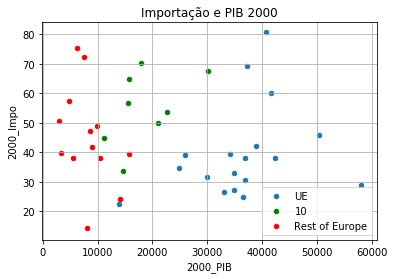

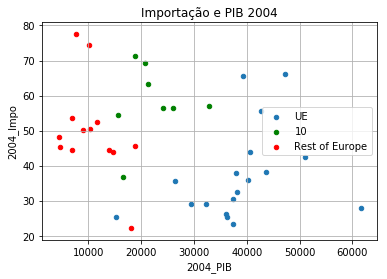

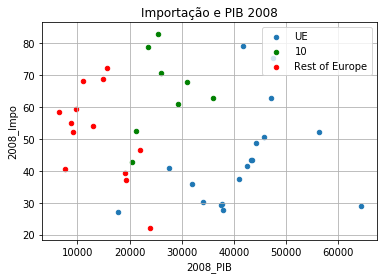

In [118]:
a = data2000EUminus10n.plot.scatter(x='2000_PIB',y='2000_Impo', label='UE')
plt.grid(True)
data200010n.plot.scatter(x='2000_PIB',y='2000_Impo', label='10', ax = a, color = 'g')
plt.grid(True)
data2000RestEuropen.plot.scatter(x='2000_PIB',y='2000_Impo', label='Rest of Europe', ax = a, color = 'r')
plt.title('Importação e PIB 2000')
plt.grid(True)

b = data2004EUminus10n.plot.scatter(x='2004_PIB',y='2004_Impo', label='UE')
plt.grid(True)
data200410n.plot.scatter(x='2004_PIB',y='2004_Impo', label='10', ax= b, color = 'g')
plt.grid(True)
data2004RestEuropen.plot.scatter(x='2004_PIB',y='2004_Impo', label='Rest of Europe', color = 'r', ax = b)
plt.title('Importação e PIB 2004')
plt.grid(True)

c=data2008EUminus10n.plot.scatter(x='2008_PIB',y='2008_Impo', label='UE')
plt.grid(True)
data200810n.plot.scatter(x='2008_PIB',y='2008_Impo', label='10', ax=c, color = 'g')
plt.grid(True)
data2008RestEuropen.plot.scatter(x='2008_PIB',y='2008_Impo', label='Rest of Europe', color = 'r', ax = c)
plt.title('Importação e PIB 2008')
plt.grid(True)

## Não consegui usar subplot aqui por alguma razão ##

Como se pode observar, é dificil notar qualquer relação entre importação e PIB per capita tanto entre os três grupos como em um todo. É possivel, no entanto, que ao olhar os dados somente da UE durante estes anos, principalmente em 2008, se note uma leve tendência positiva.

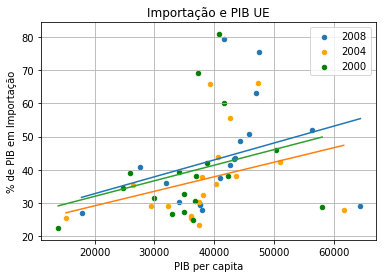

In [119]:
j1=data2008EUminus10n['2008_PIB'].values
i1=data2008EUminus10n['2008_Impo'].values
j2=data2004EUminus10n['2004_PIB'].values
i2=data2004EUminus10n['2004_Impo'].values
j3=data2000EUminus10n['2000_PIB'].values
i3=data2000EUminus10n['2000_Impo'].values

w=data2008EUminus10n.plot.scatter(x='2008_PIB',y='2008_Impo', label='2008')
data2004EUminus10n.plot.scatter(x='2004_PIB',y='2004_Impo', label='2004', ax = w, color='orange')
data2000EUminus10n.plot.scatter(x='2000_PIB',y='2000_Impo', label='2000', ax = w, color='g')
plt.plot(np.unique(j1), np.poly1d(np.polyfit(j1, i1, 1))(np.unique(j1)))
plt.plot(np.unique(j2), np.poly1d(np.polyfit(j2, i2, 1))(np.unique(j2)))
plt.plot(np.unique(j3), np.poly1d(np.polyfit(j3, i3, 1))(np.unique(j3)))

plt.title('Importação e PIB UE')
plt.xlabel("PIB per capita")
plt.ylabel('% de PIB em Importação')
plt.grid(True)

Contudo, não se pode afirmar com total certeza que esta relação realmente é significativa e que as duas variaveis realmente estejam conectadas, pois há a possibilidade de que isto seja coincidência e que a hipótese nula seja comprovada.

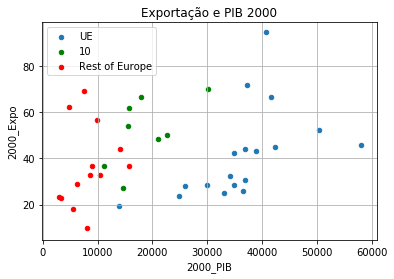

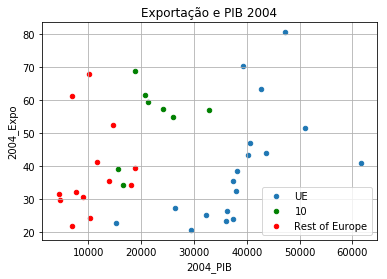

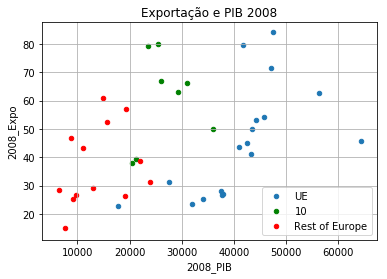

In [120]:
a = data2000EUminus10n.plot.scatter(x='2000_PIB',y='2000_Expo', label='UE')
plt.grid(True)
data200010n.plot.scatter(x='2000_PIB',y='2000_Expo', label='10', ax = a, color = 'g')
plt.grid(True)
data2000RestEuropen.plot.scatter(x='2000_PIB',y='2000_Expo', label='Rest of Europe', ax = a, color = 'r')
plt.title('Exportação e PIB 2000')
plt.grid(True)

b = data2004EUminus10n.plot.scatter(x='2004_PIB',y='2004_Expo', label='UE')
plt.grid(True)
data200410n.plot.scatter(x='2004_PIB',y='2004_Expo', label='10', ax= b, color = 'g')
plt.grid(True)
data2004RestEuropen.plot.scatter(x='2004_PIB',y='2004_Expo', label='Rest of Europe', color = 'r', ax = b)
plt.title('Exportação e PIB 2004')
plt.grid(True)

c=data2008EUminus10n.plot.scatter(x='2008_PIB',y='2008_Expo', label='UE')
plt.grid(True)
data200810n.plot.scatter(x='2008_PIB',y='2008_Expo', label='10', ax=c, color = 'g')
plt.grid(True)
data2008RestEuropen.plot.scatter(x='2008_PIB',y='2008_Expo', label='Rest of Europe', color = 'r', ax = c)
plt.title('Exportação e PIB 2008')
plt.grid(True)

Em relação ao impacto de PIB em exportação também é dificil notar uma clara influencia de um fator no outro. Mas, assim como nos gráficos de PIB e importação, é possivel notar uma correlação positiva entre PIB e exportação para países da UE. A linha de tendênca deste gráfico é nitidamente mais acentuada, com isso é demonstrado uma corelação mais contundente. Nos outos grupos é exremamente dificil notar alguma correlação.

Text(0, 0.5, '% de PIB em Exportação')

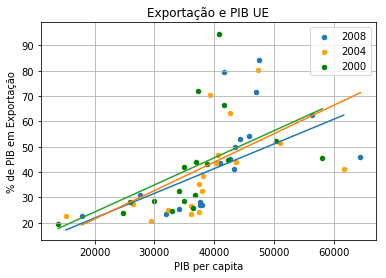

In [121]:
x1=data2008EUminus10n['2008_PIB'].values
y1=data2008EUminus10n['2008_Expo'].values
x2=data2004EUminus10n['2004_PIB'].values
y2=data2004EUminus10n['2004_Expo'].values
x3=data2000EUminus10n['2000_PIB'].values
y3=data2000EUminus10n['2000_Expo'].values


a = data2008EUminus10n.plot.scatter(x='2008_PIB',y='2008_Expo', label='2008')
data2004EUminus10n.plot.scatter(x='2004_PIB',y='2004_Expo', label='2004', ax = a, color='orange')
data2000EUminus10n.plot.scatter(x='2000_PIB',y='2000_Expo', label='2000', ax = a, color='g')
plt.plot(np.unique(x2), np.poly1d(np.polyfit(x2, y2, 1))(np.unique(x2)))
plt.plot(np.unique(x1), np.poly1d(np.polyfit(x1, y1, 1))(np.unique(x1)))
plt.plot(np.unique(x3), np.poly1d(np.polyfit(x3, y3, 1))(np.unique(x3)))


plt.title('Exportação e PIB UE')
plt.grid(True)
plt.xlabel("PIB per capita")
plt.ylabel('% de PIB em Exportação')

Quando comparadas as linhas de tendência dos gráficos de importação aos de exportação se nota claramente a diferente de inclinaçã entre os dois, o que demonstra uma corelaçnao maior e mais significativa no gráfico de exportação e PIB per capita.

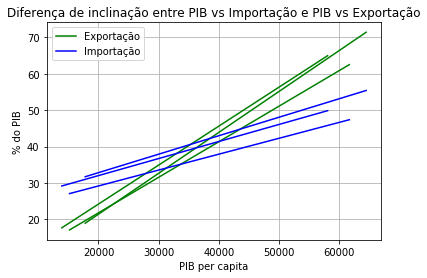

In [122]:
plt.plot(np.unique(x2), np.poly1d(np.polyfit(x2, y2, 1))(np.unique(x2)), color= 'g')
plt.plot(np.unique(x1), np.poly1d(np.polyfit(x1, y1, 1))(np.unique(x1)), color= 'g')
plt.plot(np.unique(x3), np.poly1d(np.polyfit(x3, y3, 1))(np.unique(x3)), color= 'g', label='Exportação')
plt.plot(np.unique(j1), np.poly1d(np.polyfit(j1, i1, 1))(np.unique(j1)), color= 'b')
plt.plot(np.unique(j2), np.poly1d(np.polyfit(j2, i2, 1))(np.unique(j2)), color= 'b')
plt.plot(np.unique(j3), np.poly1d(np.polyfit(j3, i3, 1))(np.unique(j3)), color= 'b', label='Importação')
plt.legend()
plt.title('Diferença de inclinação entre PIB vs Importação e PIB vs Exportação')
plt.xlabel('PIB per capita')
plt.ylabel("% do PIB")
plt.grid(True)

## Análise

A segunda parte da hipótese afirmou que haverá uma corelação positiva entre PIB per capita e exportação na UE. Esta suposição está comprovada acima. É verdade que a correlação não é tão nítida inicialmente, mas não se pode negar que há um padrão ao menos nestes anos que foram estudados. Além disso, a hipótese afirmou que não haveria correlação nenhuma entre importação e PIB per capita. Embora exista uma corelação positiva sutil entre estas variáveis, ela foi considerada estatisticamente insignificante pois a inclinação da linha de tendência é baixa. Com isso a segunda parte da hipótese se mostra acertada.

## <font color='red'>Conclusão</font>

Neste projeto a pergunta que se buscava responder era: Que impacto que membros da União Europeia e países europeus com acordos com a UE sentem nas suas importações e exportações devido aos acordos formados e como que o PIB per capita de um país influencia nisto?

Para se responder esta pergunta foram reunidos dados do gapminder e analisados com base em boxplots, gráficos de linha e gráficos de dispersão. Para se determinar o impacto na importação e exportação que membros da UE e outros países da Europa sentem, devido aos acordos econômicos, foi pego o ano de 2004 como base pois neste ano entraram 10 países novos na UE. Os dados nos mostram que, no geral, a tendência é que os pactos econômicos da União Europeia façam com que a importação e a exportação de todos inclusos nestes pactos aumente. Ademais, os outros países da Europa de fora da UE sentem uma queda na quantidade ou na taxa de crescimento, em porcento de PIB, de importação e exportação por conta de possiveis razões já expostas na análise do gráfico.

Além disso os gráficos de disperção demonstram que, somente para países que estavam na UE há mais de 4 anos, há uma tendencia do PIB per capita estar positivamente correlacionado a importação. Contudo, foi determinado que a ligeira correlação positiva encontrada entre PIB per capita e exportação de países da UE não era estatisticamente significante. Esta foi uma interpretação pessoal que levou a conclusão de que não há, em nenhum dos grupos de países Europeus, relação entre PIB per capita e exportação. Caso a correlação desta tivesse sido interpretada como significante, o resultado seria outro.


**Trabalhos Citados**

<ul>
    <li>https://core.ac.uk/download/pdf/6494768.pdf</li>
    <li>https://www.researchgate.net/publication281116955_Relationship_Between_Gdp_and_Export_In_Turkey</li>
    <li>https://mpra.ub.uni-muenchen.de›MPRA_paper_76044</li>
    <li>https://en.wikipedia.org/wiki/Member_state_of_the_European_Union</li>
    <li>https://www.youtube.com/watch?v=K8tmHxDT-48</li>
    <li>https://www.youtube.com/watch?v=sHjPJPKX07o&t=3s&index=2&list=PLa9zPc4IBEBfE1YnVyKd9rjYVZgRaIGJh</li>
    <li>https://www.youtube.com/watch?v=gxxrd88-674&t=1s&index=4&list=PLa9zPc4IBEBfE1YnVyKd9rjYVZgRaIGJh</li>
    <li>https://europarlamentti.info/en/values-and-objectives/objectives/</li>
</ul>